In [16]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import json
import pandas as pd
from math import isqrt
from tqdm import tqdm

Предел проверки

In [130]:
MAX_N = 100000

Решето Эратосфена

In [131]:
is_prime = np.ones(MAX_N + 1, dtype=bool)
is_prime[:2] = False
for i in range(2, int(MAX_N ** 0.5) + 1):
    if is_prime[i]:
        is_prime[i*i:MAX_N+1:i] = False
prime_set = set(np.flatnonzero(is_prime))
prime_set = sorted(prime_set)

Хранилище

In [132]:
prime_counts = defaultdict(int)
unique_primes_seen = set()
sums_of_reciprocals = []
square_values = []

Основной цикл по чётным квадратам

In [133]:
n = 2
while (sq := n * n) <= MAX_N:
    for p in range(2, sq // 2 + 1):
        if is_prime[p]:
            q = sq - p
            if q in prime_set:
                if p != 2:
                    prime_counts[p] += 1
                if q != 2:
                    prime_counts[q] += 1
                unique_primes_seen.update(x for x in (p, q) if x != 2)
    # сумма обратных уникальных простых
    sum_reciprocals = sum(1 / p for p in unique_primes_seen)
    sums_of_reciprocals.append(sum_reciprocals)
    square_values.append(sq)
    n += 2

In [134]:
unique_primes_seen = sorted(unique_primes_seen)

In [135]:
print('Всего простых чисел ( от 2 до', MAX_N,'):', np.size(prime_set))
print('Всего четных квадратов ( от 2 до', MAX_N,'):', np.size(square_values))
print('Всего уникальных простых, учавствующих в разложении:',np.size(unique_primes_seen))

Всего простых чисел ( от 2 до 100000 ): 9592
Всего четных квадратов ( от 2 до 100000 ): 158
Всего уникальных простых, учавствующих в разложении: 9092


График частот появления простых

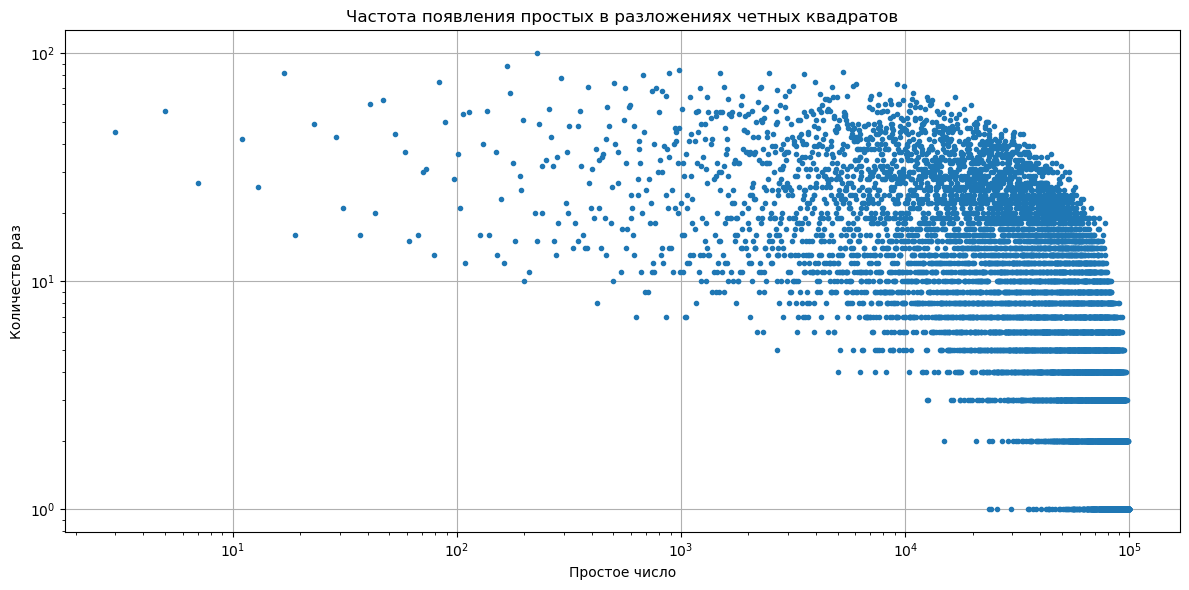

In [136]:
primes_sorted, counts = zip(*sorted(prime_counts.items()))
plt.figure(figsize=(12, 6))
plt.plot(primes_sorted, counts, marker='.', linestyle='none')
plt.xscale('log')
plt.yscale('log')
plt.title("Частота появления простых в разложениях четных квадратов")
plt.xlabel("Простое число")
plt.ylabel("Количество раз")
plt.grid(True)
plt.tight_layout()
plt.show()

График роста суммы обратных

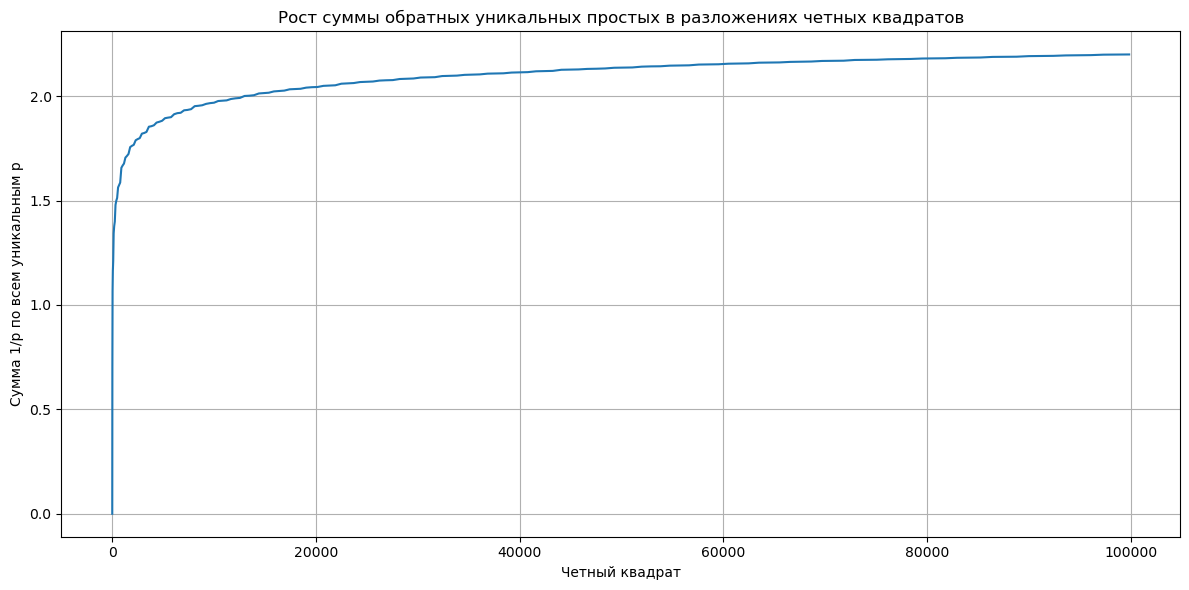

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(square_values, sums_of_reciprocals)
plt.title("Рост суммы обратных уникальных простых в разложениях четных квадратов")
plt.xlabel("Четный квадрат")
plt.ylabel("Сумма 1/p по всем уникальным p")
plt.grid(True)
plt.tight_layout()
plt.show()

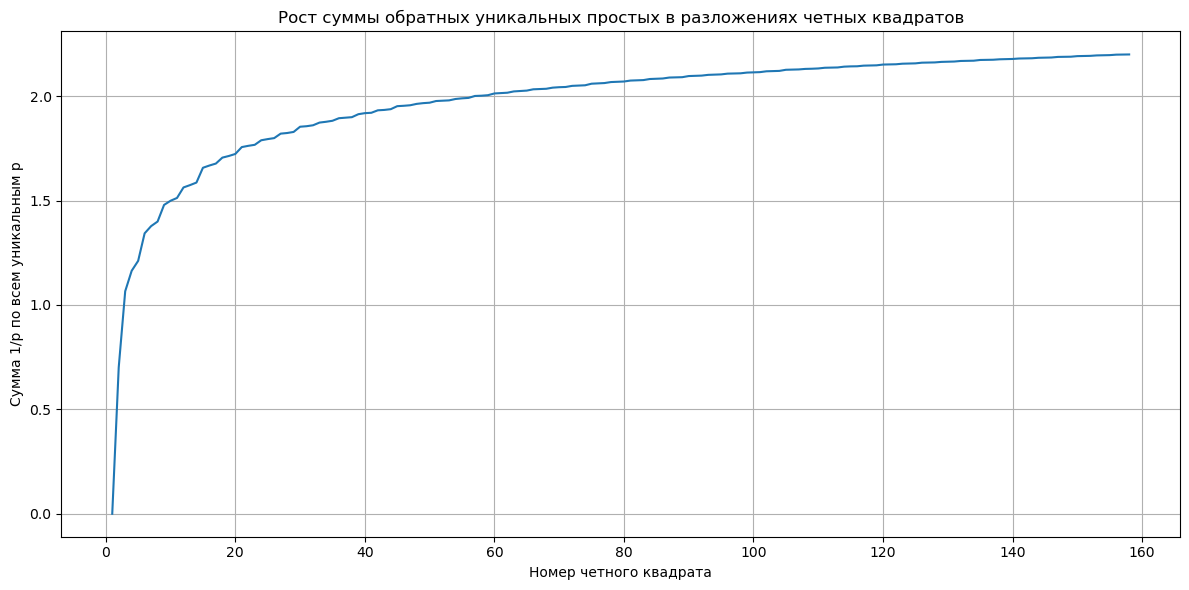

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(sums_of_reciprocals) + 1), sums_of_reciprocals)
plt.title("Рост суммы обратных уникальных простых в разложениях четных квадратов")
plt.xlabel("Номер четного квадрата")
plt.ylabel("Сумма 1/p по всем уникальным p")
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
sums_of_reciprocals[-1]

2.199693228174797

Комета Гольдбаха

In [140]:
goldbach_points_x = []
goldbach_points_y = []

for idx, sq in enumerate(square_values):
    for p in range(3, sq // 2 + 1, 2):  # только нечетные p
        q = sq - p
        if p in prime_set and q in prime_set:
            goldbach_points_x.append(p)
            goldbach_points_y.append(idx + 1)  # номер простого числа

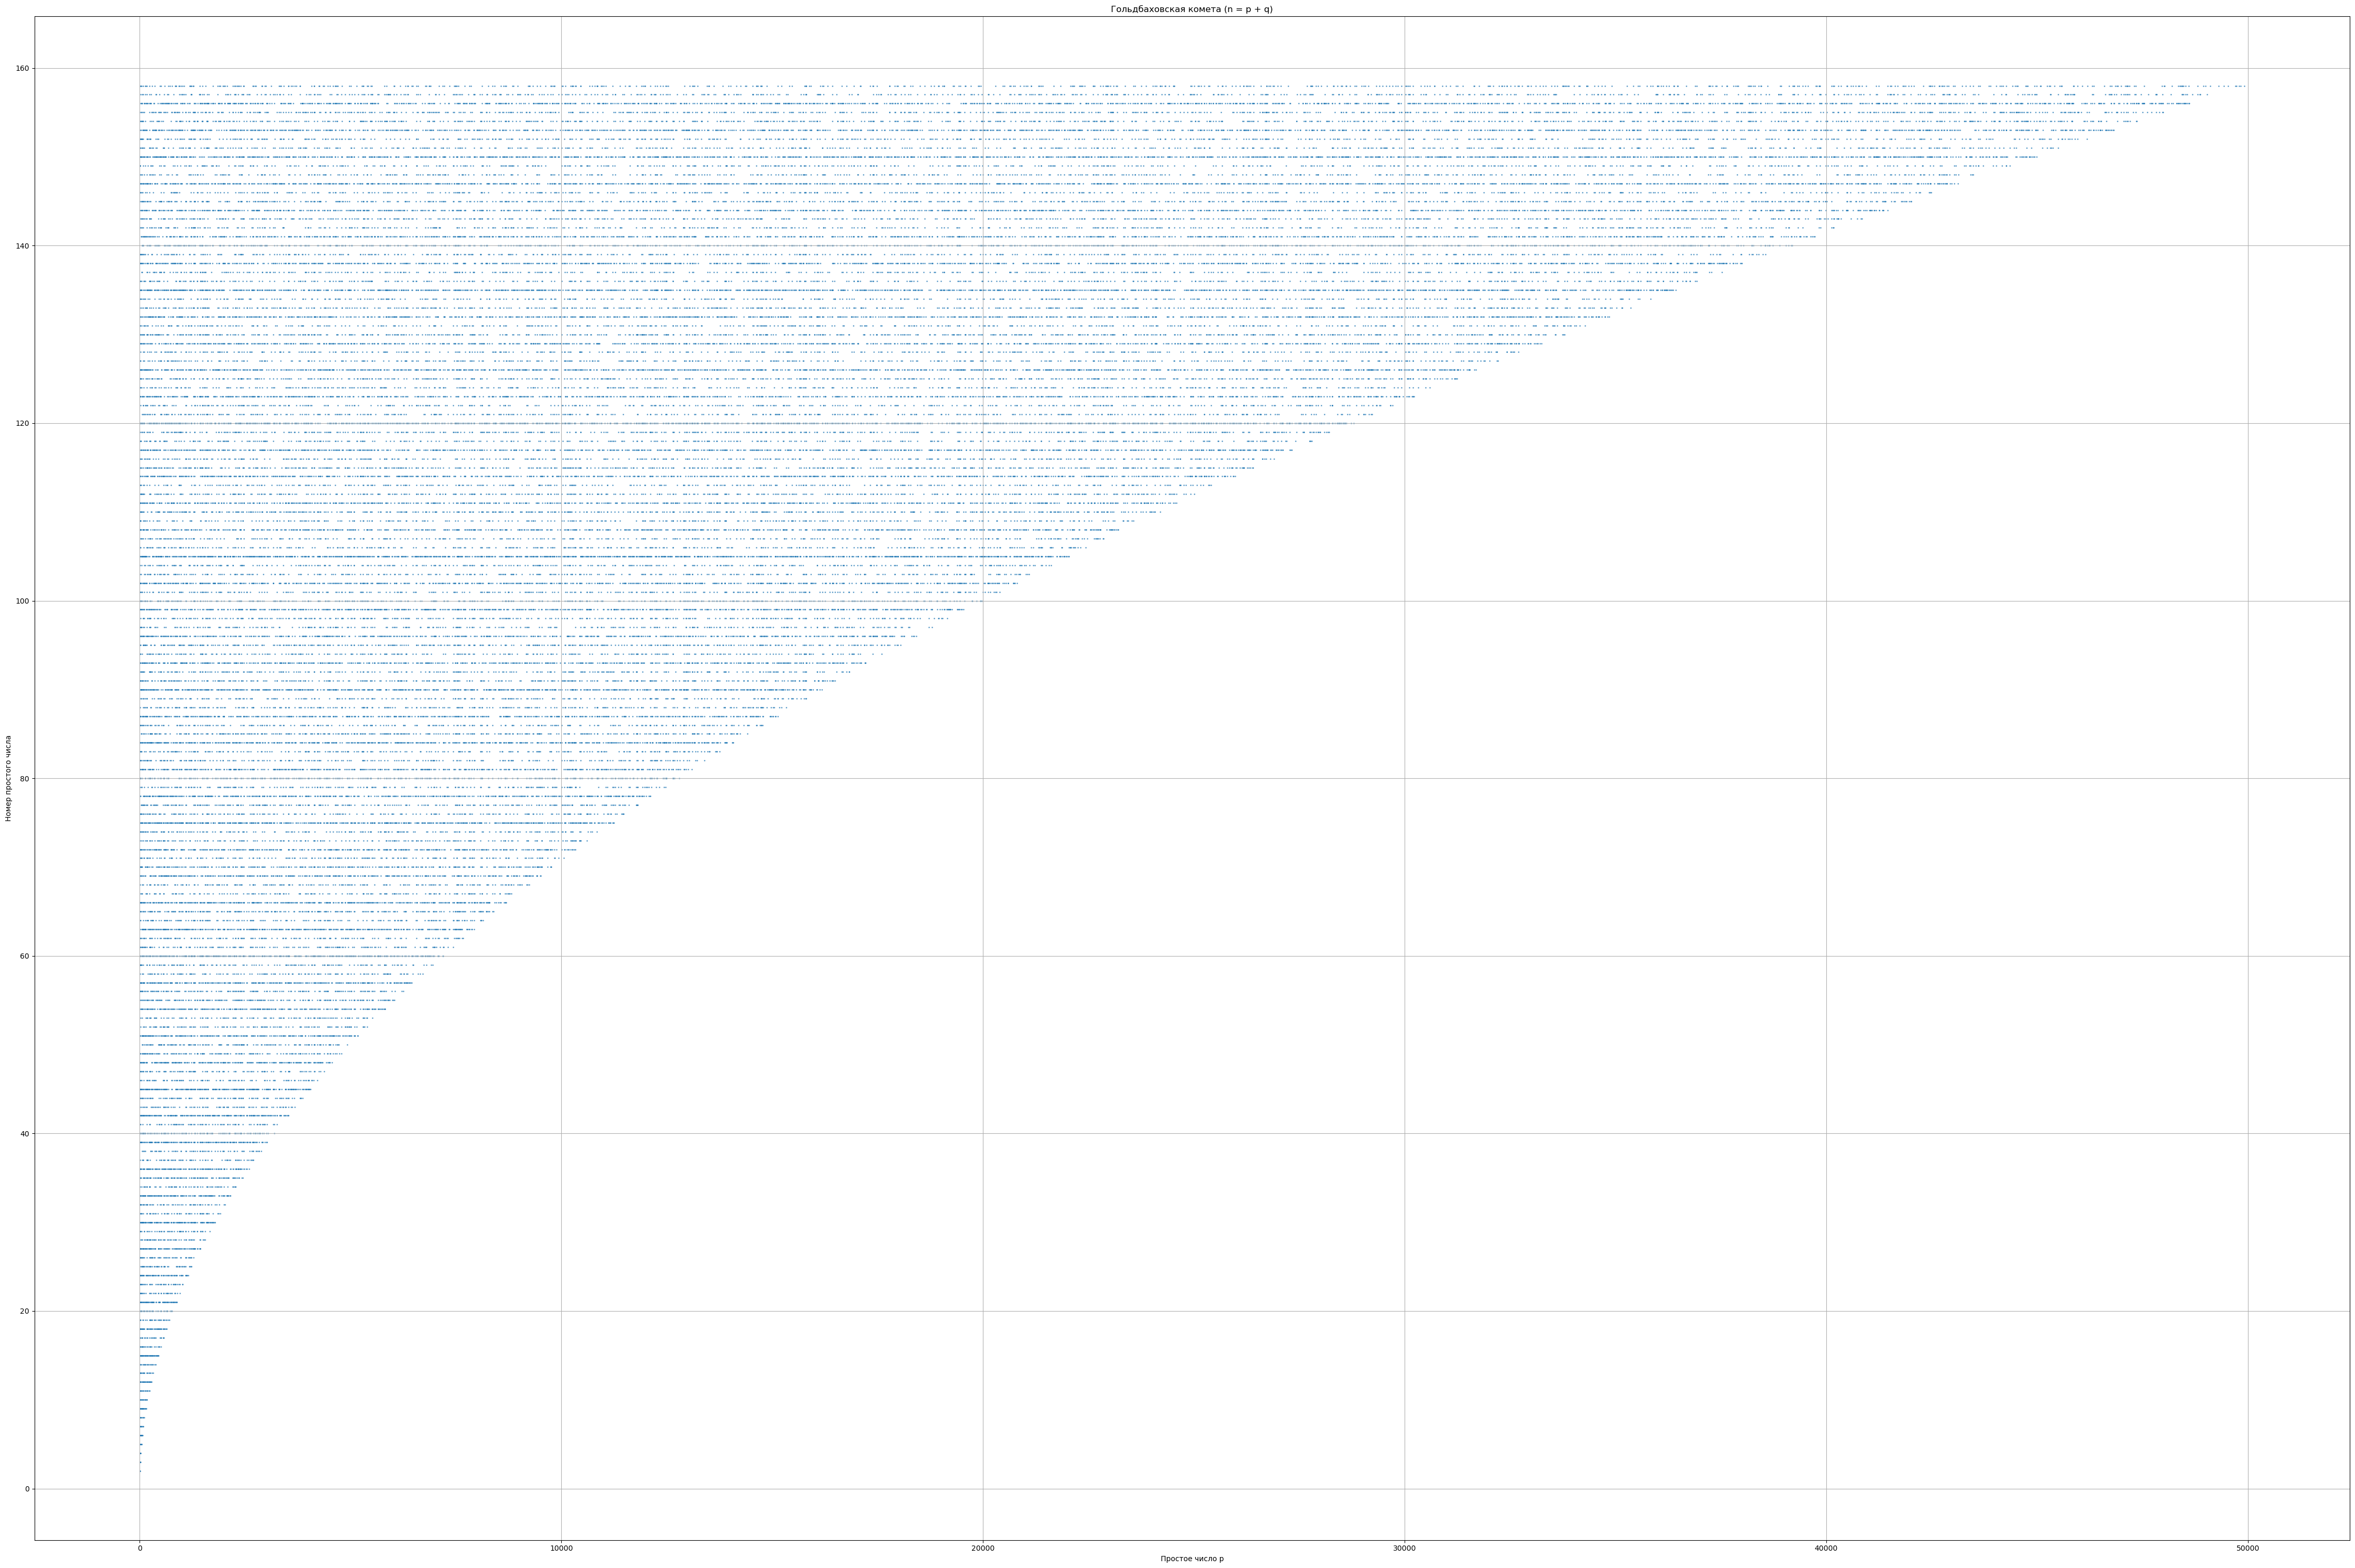

In [193]:
plt.figure(figsize=(45, 30))
plt.scatter(goldbach_points_x, goldbach_points_y, s=1, alpha=0.6)
plt.title("Гольдбаховская комета (n = p + q)")
plt.xlabel("Простое число p")
plt.ylabel("Номер простого числа")
plt.grid(True)
plt.tight_layout()
plt.show()

# mod 5 and mod 7

In [177]:
MAX_N = 10000

In [178]:
# Решето Эратосфена
is_prime = np.ones(MAX_N + 1, dtype=bool)
is_prime[:2] = False
for i in range(2, int(MAX_N**0.5) + 1):
    if is_prime[i]:
        is_prime[i*i:MAX_N+1:i] = False
prime_set = set(np.flatnonzero(is_prime))

In [179]:
mod3_bins = {r: [] for r in range(3)}
mod4_bins = {r: [] for r in range(4)}
mod5_bins = {r: [] for r in range(5)}
mod6_bins = {r: [] for r in range(6)}
mod7_bins = {r: [] for r in range(7)}

In [182]:
n = 2
while (sq := n * n) <= MAX_N:
    k = n // 2
    count = 0
    for p in range(3, sq // 2 + 1, 2):  # только нечётные
        q = sq - p
        if p in prime_set and q in prime_set:
            count += 1
    mod3_bins[k % 3].append(count)
    mod4_bins[k % 4].append(count)
    mod5_bins[k % 5].append(count)
    mod6_bins[k % 6].append(count)
    mod7_bins[k % 7].append(count)
    n += 2

In [183]:
# Средние значения
avg_mod3 = [np.mean(mod3_bins[r]) for r in range(3)]
avg_mod4 = [np.mean(mod4_bins[r]) for r in range(4)]
avg_mod5 = [np.mean(mod5_bins[r]) for r in range(5)]
avg_mod6 = [np.mean(mod6_bins[r]) for r in range(6)]
avg_mod7 = [np.mean(mod7_bins[r]) for r in range(7)]

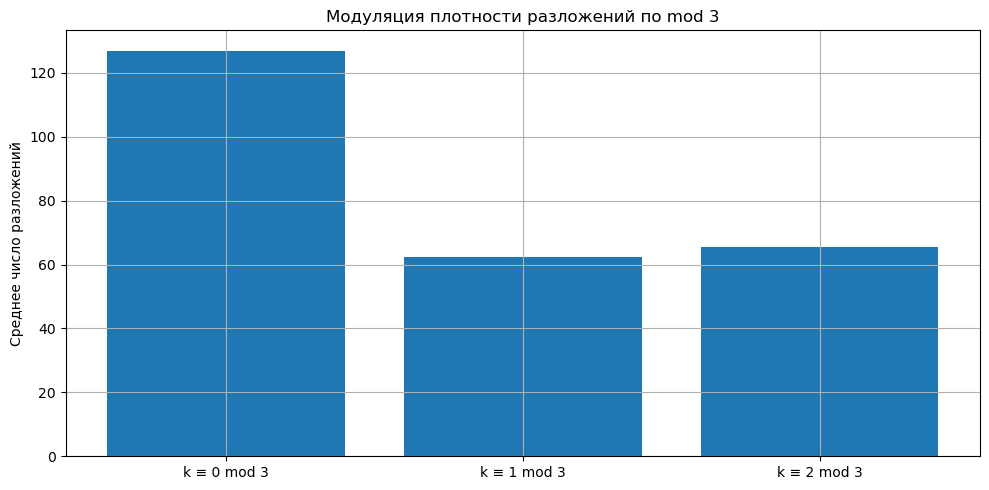

In [184]:
plt.figure(figsize=(10, 5))
plt.bar(range(3), avg_mod3, tick_label=[f'k ≡ {r} mod 3' for r in range(3)])
plt.title("Модуляция плотности разложений по mod 3")
plt.ylabel("Среднее число разложений")
plt.grid(True)
plt.tight_layout()
plt.show()

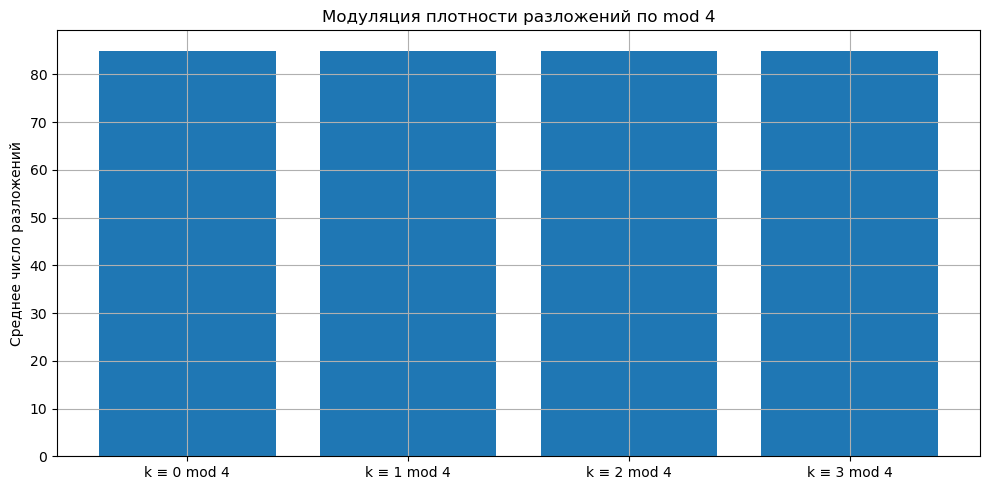

In [185]:
plt.figure(figsize=(10, 5))
plt.bar(range(4), avg_mod4, tick_label=[f'k ≡ {r} mod 4' for r in range(4)])
plt.title("Модуляция плотности разложений по mod 4")
plt.ylabel("Среднее число разложений")
plt.grid(True)
plt.tight_layout()
plt.show()

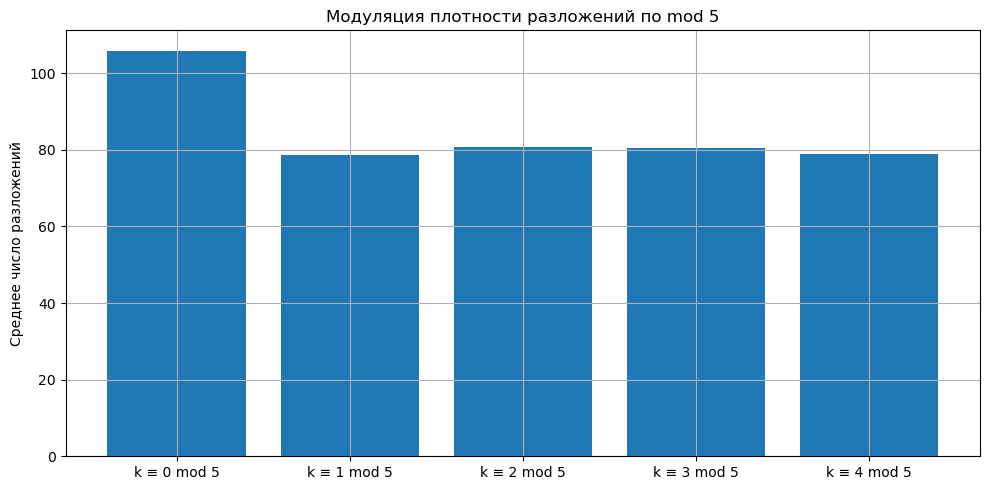

In [186]:
plt.figure(figsize=(10, 5))
plt.bar(range(5), avg_mod5, tick_label=[f'k ≡ {r} mod 5' for r in range(5)])
plt.title("Модуляция плотности разложений по mod 5")
plt.ylabel("Среднее число разложений")
plt.grid(True)
plt.tight_layout()
plt.show()

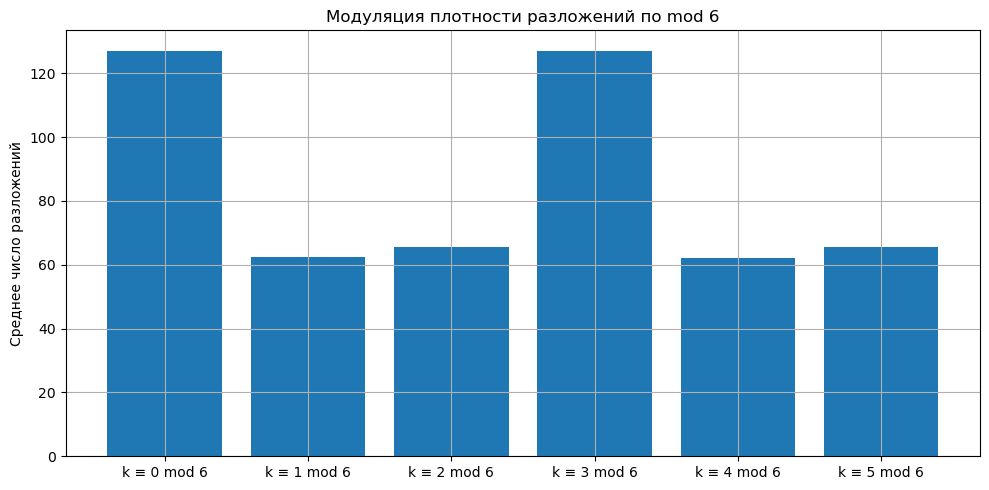

In [187]:
plt.figure(figsize=(10, 5))
plt.bar(range(6), avg_mod6, tick_label=[f'k ≡ {r} mod 6' for r in range(6)])
plt.title("Модуляция плотности разложений по mod 6")
plt.ylabel("Среднее число разложений")
plt.grid(True)
plt.tight_layout()
plt.show()

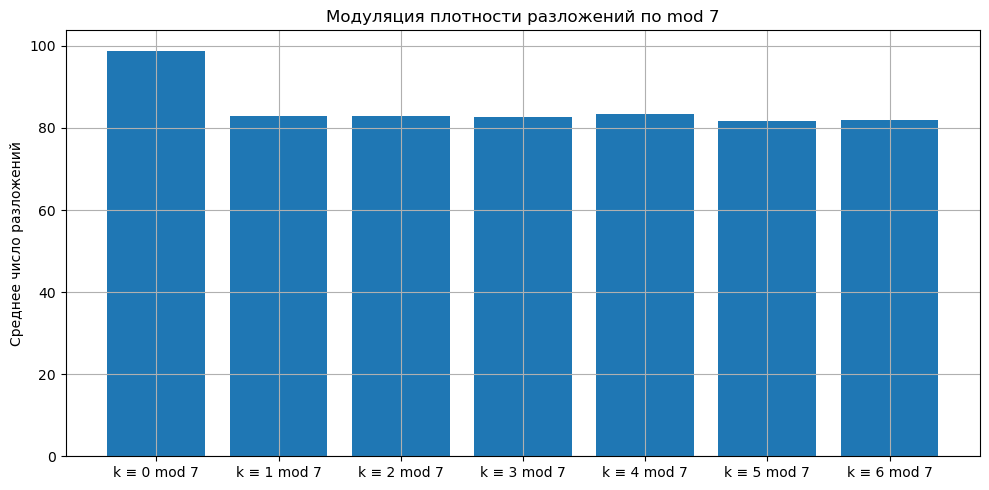

In [188]:
# Визуализация
plt.figure(figsize=(10, 5))
plt.bar(range(7), avg_mod7, tick_label=[f'k ≡ {r} mod 7' for r in range(7)])
plt.title("Модуляция плотности разложений по mod 7")
plt.ylabel("Среднее число разложений")
plt.grid(True)
plt.tight_layout()
plt.show()

# изначальная гипотеза гольдюбаха и плотность значений

In [235]:
MAX_N = 10000

In [236]:
# Решето Эратосфена
is_prime = np.ones(MAX_N + 1, dtype=bool)
is_prime[:2] = False
for i in range(2, int(MAX_N**0.5) + 1):
    if is_prime[i]:
        is_prime[i*i:MAX_N+1:i] = False
prime_set = set(np.flatnonzero(is_prime))

In [237]:
even_values = []
representation_counts = []

In [238]:
for n in range(4, MAX_N + 1, 2):  # чётные n
    count_pairs = 0
    for p in range(2, n // 2 + 1):
        q = n - p
        if p in prime_set and q in prime_set:
            count_pairs += 1
    even_values.append(n)
    representation_counts.append(count_pairs)

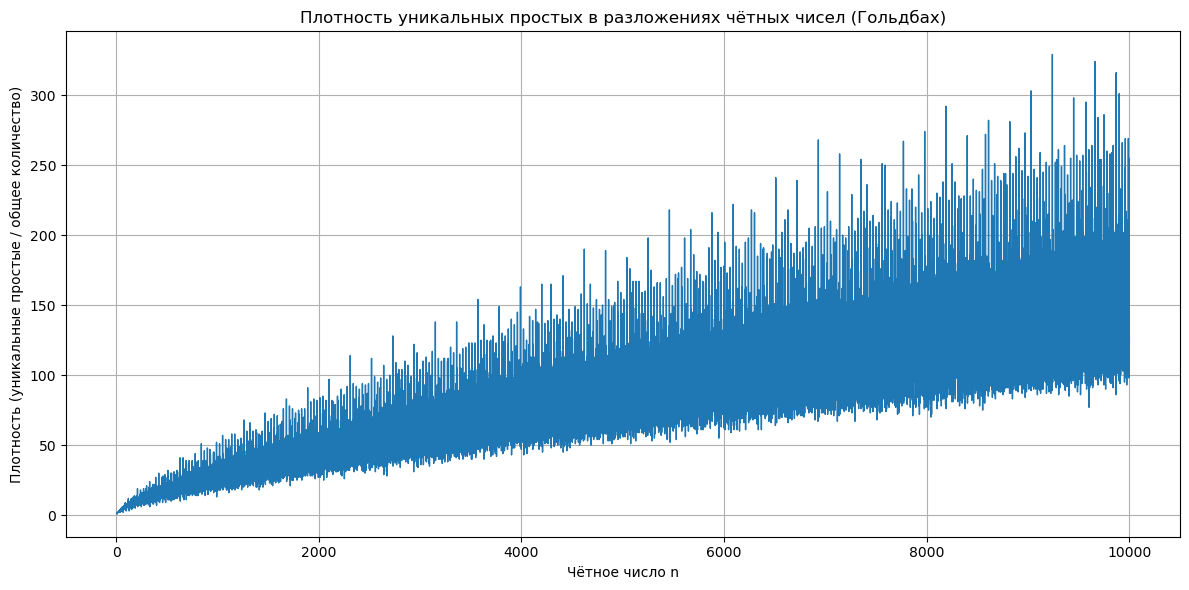

In [239]:
# График
plt.figure(figsize=(12, 6))
plt.plot(even_values, representation_counts, linewidth=1)
plt.title("Плотность уникальных простых в разложениях чётных чисел (Гольдбах)")
plt.xlabel("Чётное число n")
plt.ylabel("Плотность (уникальные простые / общее количество)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Цветом

In [300]:
# Параметры
MAX_N = 250000

In [301]:
# Решето Эратосфена
is_prime = np.ones(MAX_N + 1, dtype=bool)
is_prime[:2] = False
for i in range(2, int(MAX_N**0.5) + 1):
    if is_prime[i]:
        is_prime[i*i:MAX_N+1:i] = False
prime_set = set(np.flatnonzero(is_prime))

even_values = []
representation_counts = []
modulation_strength = []

In [302]:
small_primes = sorted(prime_set)[1:7]
print(small_primes)
max_period=3
for i in small_primes[1:]:
    max_period=max_period*i
print(max_period)

[3, 5, 7, 11, 13, 17]
255255


In [303]:
for n in range(4, MAX_N + 1, 2):  # чётные числа
    count_pairs = 0
    for p in range(2, n // 2 + 1):
        q = n - p
        if p in prime_set and q in prime_set:
            count_pairs += 1
    even_values.append(n)
    representation_counts.append(count_pairs)

    # усиление: сколько простых из списка делит n
    strength = sum(1 for p in small_primes if n % p == 0)
    #strength = sum(1 for p in small_primes if any((n - p) in prime_set for p in prime_set if p in small_primes))
    modulation_strength.append(strength)

In [304]:
# нормализация в диапазон 0–1
mod_strength_norm = np.array(modulation_strength) / max(modulation_strength)

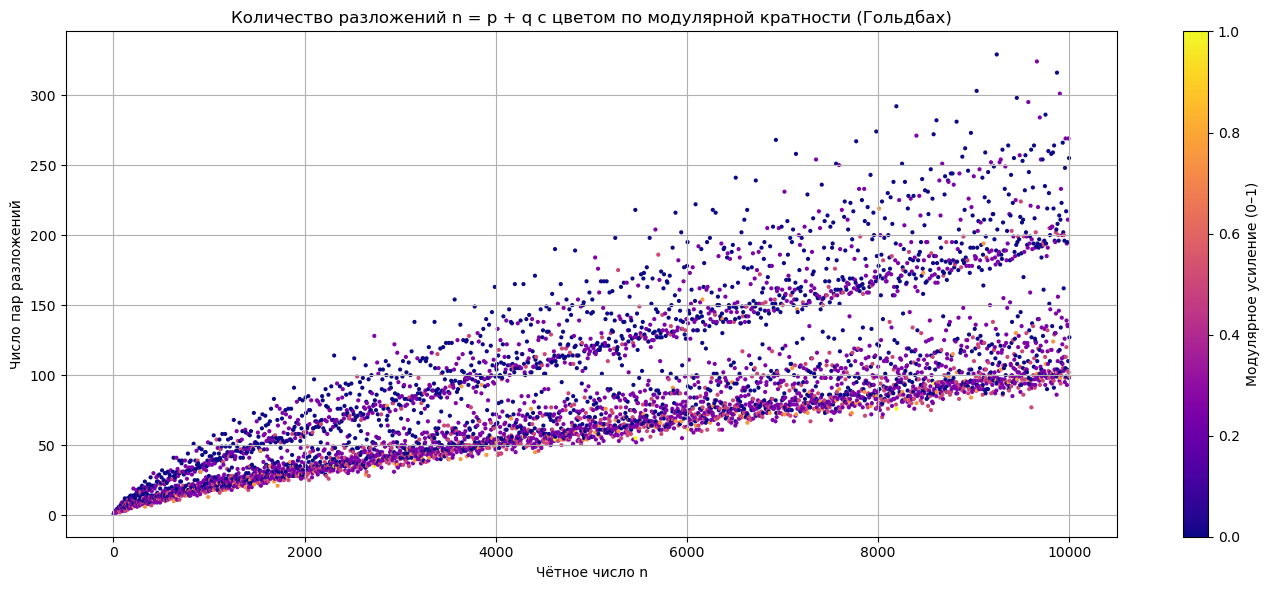

In [316]:
# визуализация: плотность разложений с цветом по модулю усиления
plt.figure(figsize=(14, 6))
scatter = plt.scatter(even_values, representation_counts, c=mod_strength_norm, cmap='plasma', s=4)
plt.title("Количество разложений n = p + q с цветом по модулярной кратности (Гольдбах)")
plt.xlabel("Чётное число n")
plt.ylabel("Число пар разложений")
plt.colorbar(scatter, label="Модулярное усиление (0–1)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Пора работать с файлами

Сохраняем список простых чисел

In [24]:
MAX_N = 50000
is_prime = np.ones(MAX_N + 1, dtype=bool)
is_prime[:2] = False
for i in range(2, int(MAX_N ** 0.5) + 1):
    if is_prime[i]:
        is_prime[i*i:MAX_N+1:i] = False

prime_list = list(map(int, np.flatnonzero(is_prime)))

# Сохраняем в текстовый файл
with open("primes_up_to_1M.txt", "w") as f:
    for p in prime_list:
        f.write(f"{p}\n")

Сохраняем все разложения чётных $n=p+q$ и отдельно множество уникальных простых

In [25]:
prime_set = set(prime_list)
unique_primes_per_n = {}

with open("goldbach_decompositions.csv", "w") as f:
    f.write("n,p,q\n")
    for n in range(4, MAX_N + 1, 2):
        unique_primes = set()
        for p in prime_list:
            if p > n // 2:
                break
            q = n - p
            if q in prime_set:
                f.write(f"{n},{p},{q}\n")
                unique_primes.add(p)
                unique_primes.add(q)
        if unique_primes:
            unique_primes_per_n[n] = sorted(unique_primes)
            
# Сохраняем в JSON
with open("goldbach_unique_primes.json", "w") as f:
    json.dump(unique_primes_per_n, f, indent=2)

# Строим графики используя данные из файлов

In [8]:
df = pd.read_csv("goldbach_decompositions.csv")

# Пример: количество разложений на каждое четное n
counts = df.groupby("n").size()

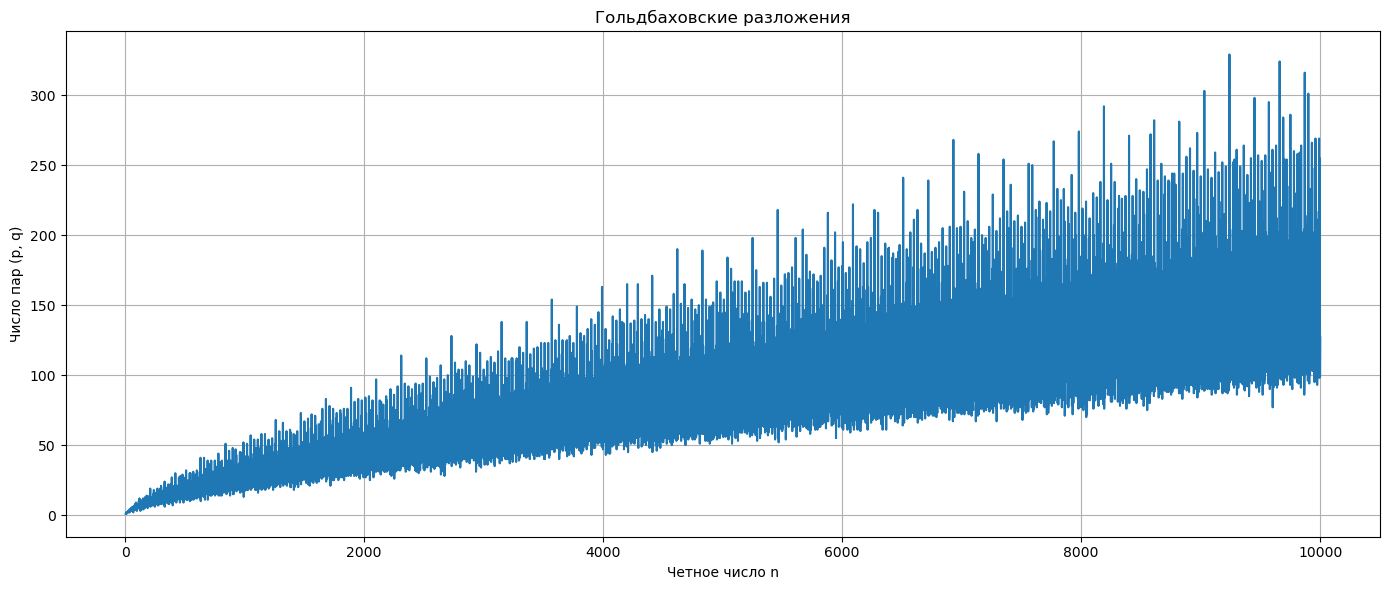

In [9]:
# Визуализация
plt.figure(figsize=(14, 6))
plt.plot(counts.index, counts.values, label="Разложений")
plt.xlabel("Четное число n")
plt.ylabel("Число пар (p, q)")
plt.title("Гольдбаховские разложения")
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
small_primes = {3, 5, 7, 11, 13, 17}

In [ ]:
# Загрузка файлов
df = pd.read_csv("goldbach_decompositions.csv")
with open("goldbach_unique_primes.json") as f:
    unique_primes_per_n = json.load(f)

In [ ]:
# Число разложений на каждое n
rep_counts = df.groupby("n").size()

# Построение списков для графика
x_vals = []
y_vals = []
colors = []     # спектральная насыщенность (малые простые в разложениях)
sizes = []      # модулярная кратность (малые простые делят n)

In [ ]:
for n_str, prime_list in unique_primes_per_n.items():
    n = int(n_str)
    x_vals.append(n)

    # Y: число разложений
    y_vals.append(rep_counts.get(n, 0))

    # Размер точки: сколько малых простых делят само n
    color_strength = sum(1 for p in small_primes if n % p == 0)
    colors.append(color_strength)

In [ ]:
# Нормализация цвета
colors_norm = np.array(colors) / max(colors)

In [ ]:
# Построение графика
plt.figure(figsize=(14, 6))
sc = plt.scatter(x_vals, y_vals, c=colors_norm, s=1, cmap='rainbow', alpha=0.8)
plt.colorbar(sc, label="Число малых простых в разложениях (цвет)")
plt.title("Гольдбаховские разложения: цвет = участие")#, размер = кратность")
plt.xlabel("Чётное число n")
plt.ylabel("Число пар (p + q = n)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Считаем корреляцию

In [382]:
# Загружаем данные
df = pd.read_csv("goldbach_decompositions.csv")
rep_counts = df.groupby("n").size()

In [383]:
# Все чётные числа и значения R(n)
even_n = np.array(sorted(rep_counts.index))
R_n = np.array([rep_counts[n] for n in even_n])

In [403]:
# Максимальный сдвиг для автокорреляции
max_shift = 1000

In [404]:
3*5*7*11

1155

In [405]:
shifts = list(range(2, max_shift + 2, 2))  # только чётные
correlations = []

In [406]:
for delta in shifts:
    mask = even_n + delta <= even_n[-1]
    base = R_n[mask]
    shifted = np.array([rep_counts.get(n + delta, 0) for n in even_n[mask]])
    
    # Pearson correlation
    corr = np.corrcoef(base, shifted)[0, 1]
    correlations.append(corr)

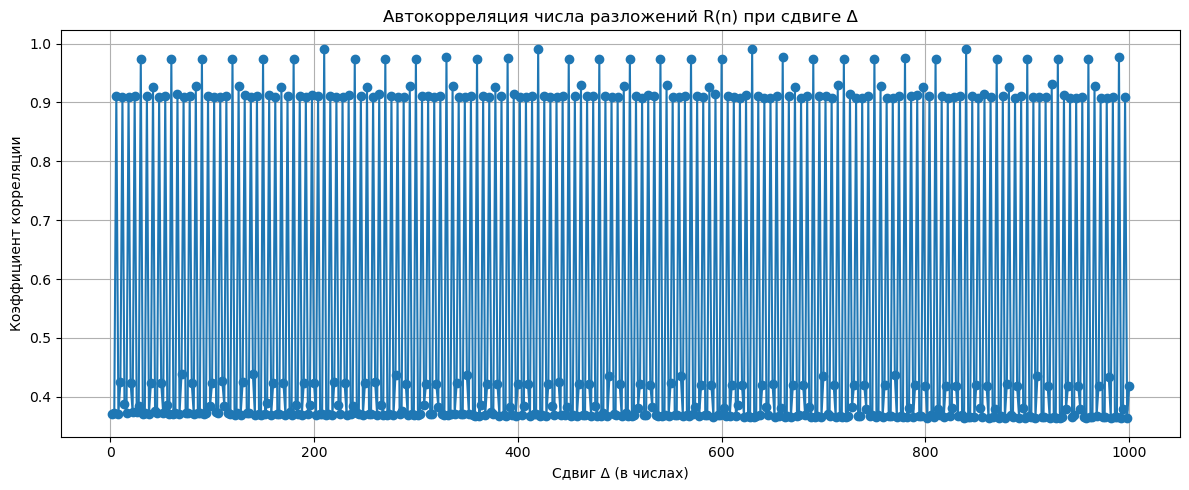

In [407]:
# Визуализация
plt.figure(figsize=(12, 5))
plt.plot(shifts, correlations, marker='o')
plt.title("Автокорреляция числа разложений R(n) при сдвиге Δ")
plt.xlabel("Сдвиг Δ (в числах)")
plt.ylabel("Коэффициент корреляции")
plt.grid(True)
plt.tight_layout()
plt.show()

# Корреляция количества разложений с числом делителей n

In [408]:
# Загружаем разложения из ранее сохранённого файла
df = pd.read_csv("goldbach_decompositions.csv")
rep_counts = df.groupby("n").size()  # R(n)

In [409]:
even_n = np.array(sorted(rep_counts.index))
R_n = np.array([rep_counts[n] for n in even_n])

# Функция числа делителей τ(n)
def count_divisors(n):
    count = 0
    for i in range(1, int(n**0.5)+1):
        if n % i == 0:
            count += 1 if i == n // i else 2
    return count

divisors_n = np.array([count_divisors(n) for n in even_n])

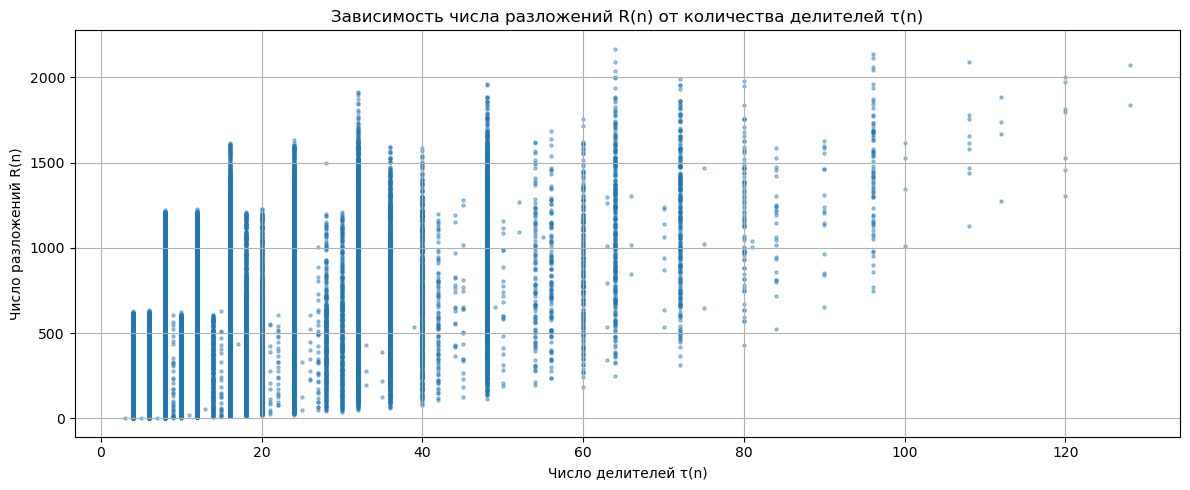

In [410]:
# Строим график зависимости
plt.figure(figsize=(12, 5))
plt.scatter(divisors_n, R_n, alpha=0.4, s=5)
plt.title("Зависимость числа разложений R(n) от количества делителей τ(n)")
plt.xlabel("Число делителей τ(n)")
plt.ylabel("Число разложений R(n)")
plt.grid(True)
plt.tight_layout()
plt.show()

# График локальной производной: $R(n+2)−R(n)$

In [411]:
# Вычисляем производную (разность соседних значений)
dR_n = np.diff(R_n)  # R(n+2) - R(n)
even_n_centered = even_n[:-1]  # координаты соответствуют n (левый конец разности)

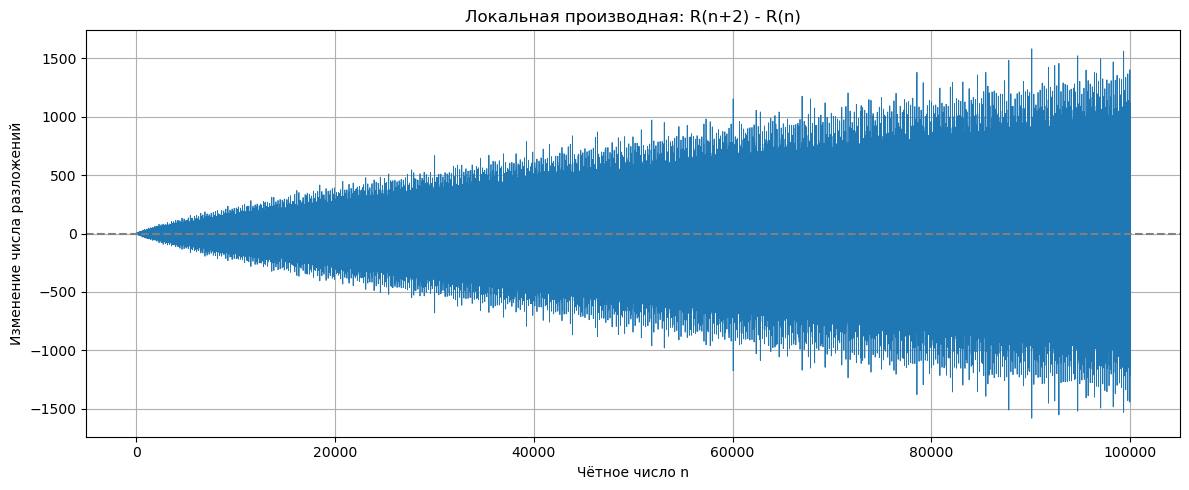

In [412]:
plt.figure(figsize=(12, 5))
plt.plot(even_n_centered, dR_n, linewidth=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Локальная производная: R(n+2) - R(n)")
plt.xlabel("Чётное число n")
plt.ylabel("Изменение числа разложений")
plt.grid(True)
plt.tight_layout()
plt.show()

# R(n) vs ω(n)  - только простые делители

In [413]:
# Загружаем разложения из ранее сохранённого файла
df = pd.read_csv("goldbach_decompositions.csv")
rep_counts = df.groupby("n").size()  # R(n)

In [414]:
even_n = np.array(sorted(rep_counts.index))
R_n = np.array([rep_counts[n] for n in even_n])

In [417]:
# Предварительно создаём список простых чисел до max(n)
def sieve(limit):
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[:2] = False
    for i in range(2, isqrt(limit) + 1):
        if is_prime[i]:
            is_prime[i*i::i] = False
    return np.flatnonzero(is_prime)

prime_list = sieve(max(even_n))

In [418]:
# Вычисляем ω(n): количество различных простых делителей
def omega(n, primes):
    count = 0
    for p in primes:
        if p * p > n:
            break
        if n % p == 0:
            count += 1
            while n % p == 0:
                n //= p
    if n > 1:
        count += 1
    return count

omega_n = np.array([omega(n, prime_list) for n in even_n])

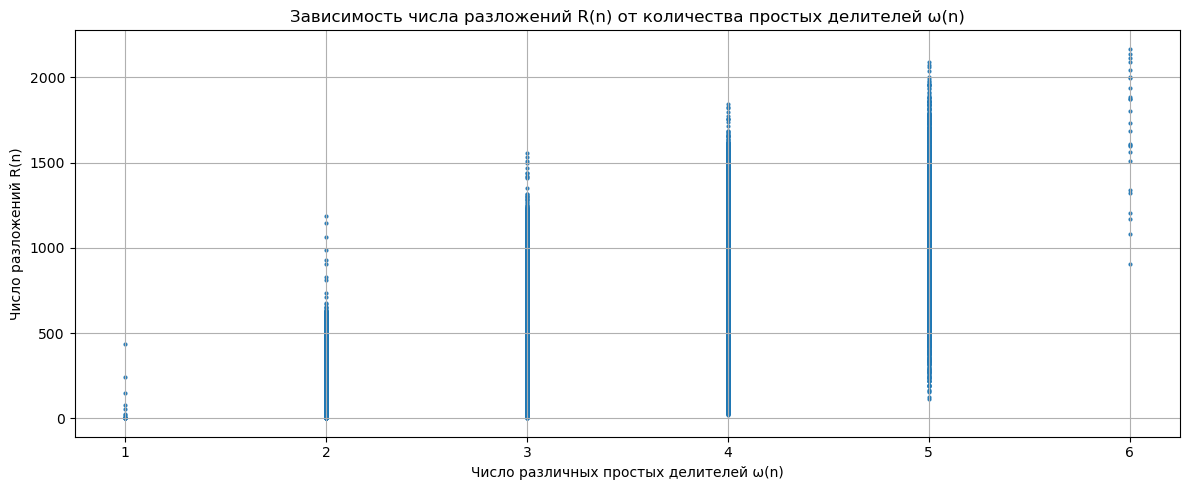

In [424]:
# Строим график зависимости
plt.figure(figsize=(12, 5))
plt.scatter(omega_n, R_n, alpha=0.9, s=4)
plt.title("Зависимость числа разложений R(n) от количества простых делителей ω(n)")
plt.xlabel("Число различных простых делителей ω(n)")
plt.ylabel("Число разложений R(n)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Только несколько первых простых чисел в разложении

In [28]:
# Загружаем файл с разложениями, ранее сохранённый
df = pd.read_csv("goldbach_decompositions.csv")

In [29]:
# Множество малых простых (можно менять)
small_primes = {3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37}
#small_primes = {3, 5, 7, 11, 13}


# Считаем количество малых простых в разложениях каждого чётного n
counts_by_n = {}

for n in tqdm(sorted(df["n"].unique()), desc="Processing even numbers"):
    rows = df[df["n"] == n]
    count = 0
    for _, row in rows.iterrows():
        p, q = row["p"], row["q"]
        count += int(p in small_primes) + int(q in small_primes)
    counts_by_n[n] = count

# Подготовка к графику
n_vals = list(counts_by_n.keys())
small_prime_counts = list(counts_by_n.values())

Processing even numbers:  68%|██████████████████████████████████▋                | 16977/24999 [12:35<05:56, 22.48it/s]


KeyboardInterrupt: 

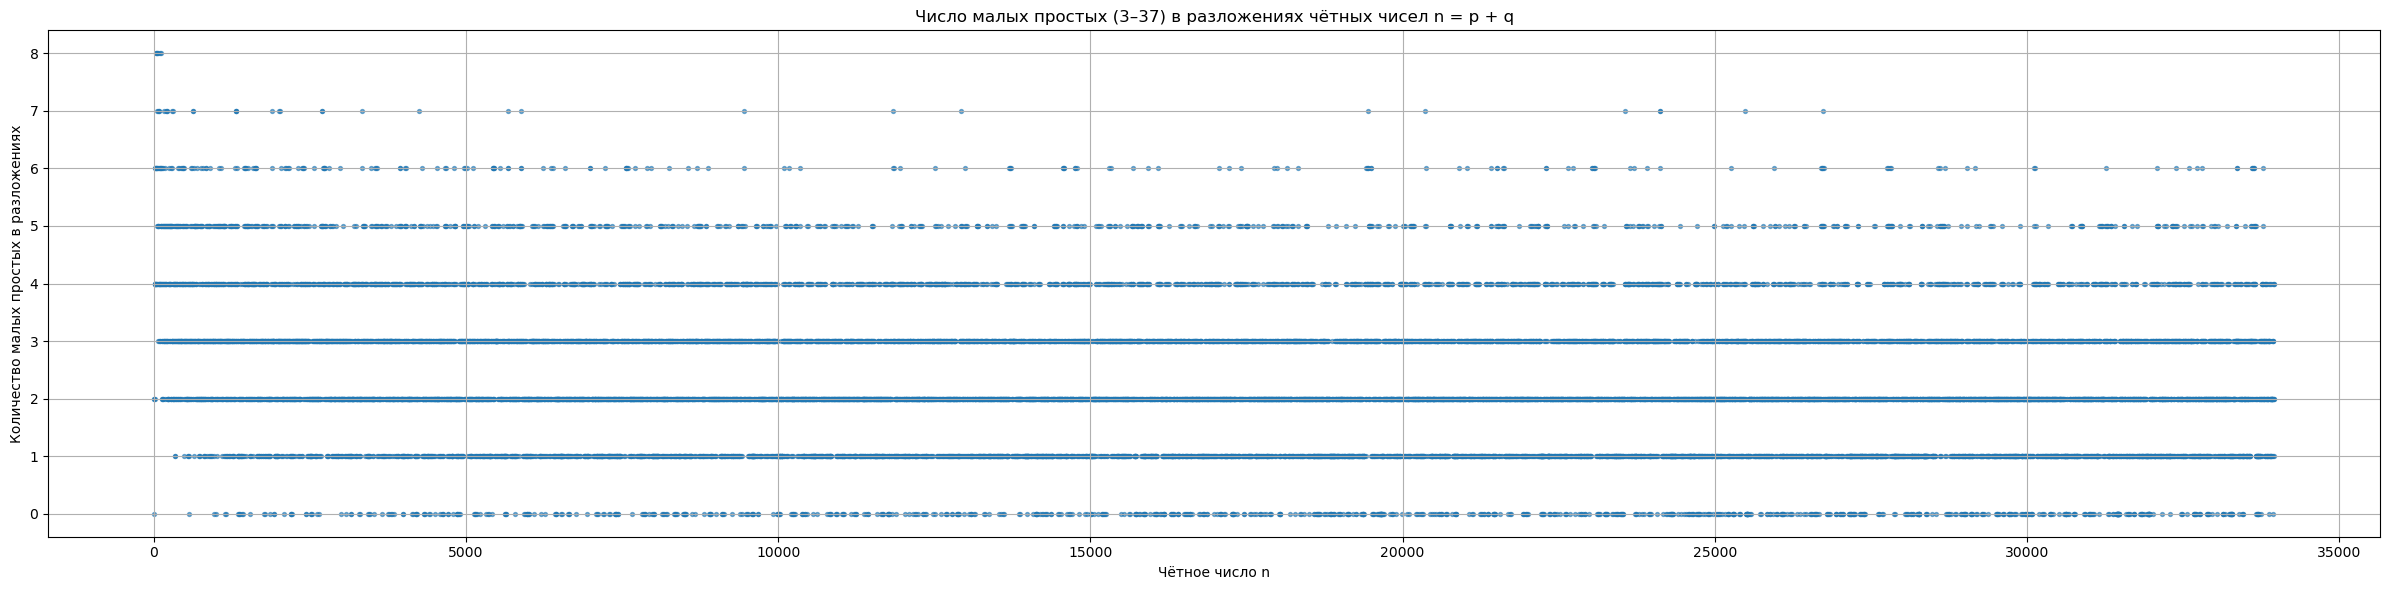

In [32]:
# График
plt.figure(figsize=(24, 6))
plt.scatter(n_vals, small_prime_counts, s=8, alpha=0.6)
plt.title("Число малых простых (3–37) в разложениях чётных чисел n = p + q")
plt.xlabel("Чётное число n")
plt.ylabel("Количество малых простых в разложениях")
plt.grid(True)
plt.tight_layout()
plt.show()